원주율: 0.040000
실행 시간: 0.003416


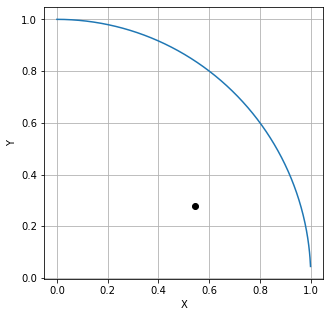

AttributeError: 'float' object has no attribute 'perf_counter'

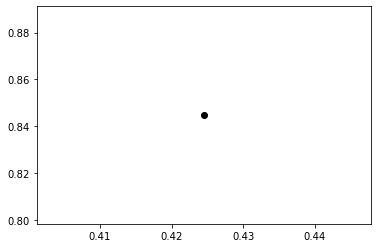

In [14]:
# 몬테카를로 방법(Monte Carlo method)에 의한 원주율 추정 실시
# : 난수를 이용하여 값을 예측하는 방법
    
# 1X1 정사각형 내에 임의의 점을 찍는다. 원점에서 거리가 1이하면 1포인트 추가, 1보다 크면 0포인트 추가. 
# 이 작업을 N번(N은 스스로 결정)반복한다. 
# 총 획득 포인트를 X라고 할 때 4X/N가 원주율의 근삿값이 되므로 몬테카를로 방법으로 원주율 추정 가능

import matplotlib.pyplot as plt
import numpy as np
import math
import time

%matplotlib inline

np.random.seed(100)

X = 0 #원 안에 들어간 횟수

#시도 횟수 N 지정
N = 100

#사분면 경계의 방정식[y=√(1-x^2)(0<=x<=1)] 그리기
circle_x = np.arange(0, 1, 0.001)
circle_y = np.sqrt(1-circle_x * circle_x)
plt.figure(figsize=(5, 5))
plt.plot(circle_x, circle_y)

#N번 시도에 걸리는 시간 측정
start_time = time.perf_counter()

#N번 시도
for i in range(0, N):
    #0에서 1 사이의 균등 난수 생성하여 변수 score_x에 저장
    score_x = np.random.rand()
    
    #0에서 1 사이의 균등 난수 생성하여 변수 score_y에 저장
    score_y = np.random.rand()
    
    #점이 원 안에 들어간 경우와 들어가지 않은 경우 조건 분기 하기
    if score_x*score_x + score_y*score_y < 1:
        
        #원 안에 들어가면 검은색으로, 들어가지 않으면 파란색으로 표시
        plt.scatter(score_x, score_y, marker="o", color="k")
        
        #원 안에 들어갔다면 위에서 정한 변수 X에 1포인트 더하기
        X = X + 1
    else:
        plt.scatter(score_x, score_y, marker="o", color="b")
    
    #pi의 근삿값 계산
    pi = 4*float(X)/float(N)
    
    #몬테카를로 방법의 실행 시간 계산
    end_time = time.perf_counter()
    time = end_time - start_time
    
    #원주율의 결과 표시
    print("원주율: %.6f"% pi)
    
    print("실행 시간: %f"% (time))
    
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()